In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import pdb
import numpy as np
st = pdb.set_trace
import sys
sys.path = [r'C:\Github\fileio'] + sys.path
import fileio
import fivecentplots as fcp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## keyword docs

In [2]:
file = r'C:\GitHub\fivecentplots\fivecentplots\doc\keywords.xlsx'

In [3]:
df = pd.read_excel(file, sheet='Mandatory')

In [4]:
df

,Keyword,Data Type,Description,Required?
0,df,pandas DataFrame,DataFrame containing all data to be plotted in...,always (**note:** ``df`` can also be specified...
1,x,str,Column name of the x-axis data,all except boxplot
2,y,str,Column name of the y-axis data,all except histogram
3,z,str,Column name of the z-axis data,only for contour and heatmap


In [5]:
width = pd.DataFrame(columns=df.columns, index=[0])
for col in df.columns:
    width[col] = max(df[col].apply(lambda x: len(str(x))).max(), len(col)) + 2
width

,Keyword,Data Type,Description,Required?
0,9,18,72,118


In [6]:
line = ''
for col in width.columns:
    line += '+' + '-'*width[col].iloc[0]
line += '+\n'

In [7]:
tab = ''
for irow, row in df.iterrows():
    for col, value in row.items():
        tab += (('| %s ' % value).ljust(width[col].iloc[0]+1)).replace('nan', '   ')
    tab += '|\n'
    # check for vertical merged
    line0 = ('%s' % line).split('+')
    if irow < len(df) - 1:
        nrow = df.iloc[irow+1]
        for icol, (col, value) in enumerate(nrow.items()):
            if type(value) is float and np.isnan(value):
                line0[icol+1] = line0[icol+1].replace('-', ' ')
    line0 = '+'.join(line0)
    tab += line0
#print(tab)

In [8]:
header = line
for col in df.columns:
    header += ('| %s ' % col).ljust(width[col].iloc[0]+1)
header += '|\n'
header += line.replace('-', '=')
#print(header)

In [20]:
print(header + tab)

+---------+------------------+------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------+
| Keyword | Data Type        | Description                                                            | Required?                                                                                                            |
+=========+==================+========================================================================+======================================================================================================================+
| df      | pandas DataFrame | DataFrame containing all data to be plotted including grouping columns | always (**note:** ``df`` can also be specified as the first function argument withouth the keyword name of ``df==``) |
+---------+------------------+------------------------------------------------------------------------+-----

In [11]:
print(fileio.utilities.xls_2_rst(file, 'Contour'))

+--------------+-----------+----------------------------------------+---------+--------------------------------------------------+
| Keyword      | Data Type | Description                            | Default | Example                                          |
+==============+===========+========================================+=========+==================================================+
| :hh:`cmap`   | str       | Name of a color map                    | inferno | `contour example <contour.html#Filled-contour>`_ |
+--------------+-----------+----------------------------------------+---------+                                                  +
| :hh:`filled` | boolean   | Fill area between contour lines        | True    |                                                  |
+--------------+-----------+----------------------------------------+---------+                                                  +
| :hh:`levels` | int       | Number of contour lines/levels to draw | 20      |    

In [ ]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=True, \
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',\
              wrap='Substrate', ax_size=[300, 300],  \
              rc_label_fill_color='#fffd75', rc_label_fill_alpha=0.5,\
              rc_label_font_color='#000000', wrap_title_fill_color='#00FFFF', \
              wrap_title_font_color='#000000', label_fill_color='#FF0000', label_fill_alpha=0.5)

## bug fixes

In [3]:
df = pd.read_excel(r'C:\data\Denver_Test_Case.xlsx')

In [4]:
df.head()

,bins,values
0,NaN,6
1,-0.005976,325
2,NaN,14334
3,-0.001976,307513
4,NaN,1453260


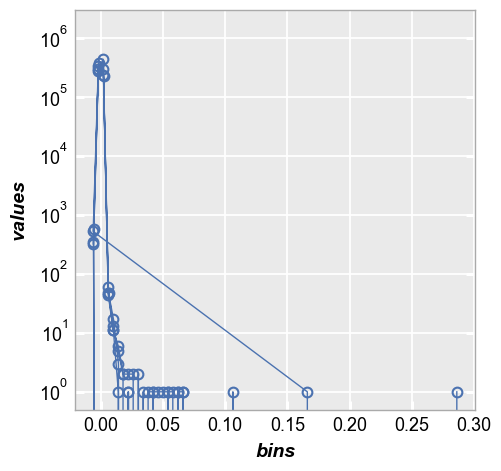

In [30]:
fcp.plot(df, x='bins', y='values', ax_scale='logy')

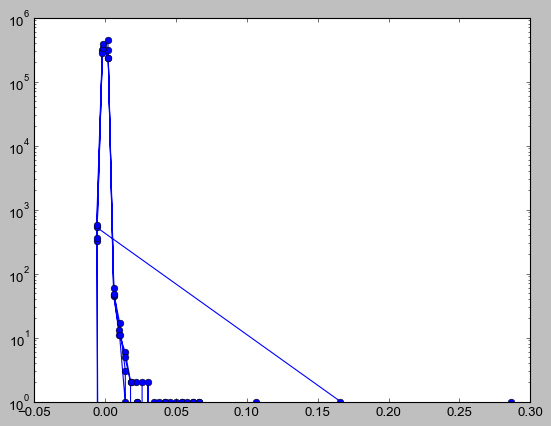

In [27]:
mask = np.isfinite(df['bins'])
plt.semilogy(df[mask]['bins'], df[mask]['values'], 'o-')
plt.show()